In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import hashlib 
import datetime
# from surprise import SVD
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv("./userid-timestamp-artid-artname-traid-traname.tsv", sep="\t", error_bad_lines=False, header = None)


b'Skipping line 2120260: expected 6 fields, saw 8\n'
b'Skipping line 2446318: expected 6 fields, saw 8\n'
b'Skipping line 11141081: expected 6 fields, saw 8\n'
b'Skipping line 11152099: expected 6 fields, saw 12\nSkipping line 11152402: expected 6 fields, saw 8\n'
b'Skipping line 11882087: expected 6 fields, saw 8\n'
b'Skipping line 12902539: expected 6 fields, saw 8\nSkipping line 12935044: expected 6 fields, saw 8\n'
b'Skipping line 17589539: expected 6 fields, saw 8\n'


In [4]:
df.columns = ['userid', 'timestamp', 'artistid', 'artist', '1', 'song']

In [5]:
df[:10]

,userid,timestamp,artistid,artist,1,song
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)
5,user_000001,2009-05-04T13:38:31Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,To Stanford (Live_2009_4_15)
6,user_000001,2009-05-04T13:33:28Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Improvisation (Live_2009_4_15)
7,user_000001,2009-05-04T13:23:45Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Glacier (Live_2009_4_15)
8,user_000001,2009-05-04T13:19:22Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Parolibre (Live_2009_4_15)
9,user_000001,2009-05-04T13:13:38Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Bibo No Aozora (Live_2009_4_15)


In [6]:
df['time'] = pd.to_datetime(df['timestamp'])

In [7]:
df.drop(['timestamp'], axis=1, inplace=True)

In [8]:
df.head()

,userid,artistid,artist,1,song,time
0,user_000001,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,2009-05-04 23:08:57+00:00
1,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15),2009-05-04 13:54:10+00:00
2,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15),2009-05-04 13:52:04+00:00
3,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15),2009-05-04 13:42:52+00:00
4,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15),2009-05-04 13:42:11+00:00


###Removing artist name and song id (possibly) from the user_songs_df dataframe

In [9]:
user_songs_df = df.drop(['artist'], axis=1, inplace=False)

In [10]:
user_songs_df.columns = ['userid', 'artistid', 'songid', 'song', 'time']

In [11]:
user_songs_df = user_songs_df.drop(['songid'], axis=1, inplace=False)

In [12]:
user_songs_df.head()

,userid,artistid,song,time
0,user_000001,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,2009-05-04 23:08:57+00:00
1,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,Composition 0919 (Live_2009_4_15),2009-05-04 13:54:10+00:00
2,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,Mc2 (Live_2009_4_15),2009-05-04 13:52:04+00:00
3,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,Hibari (Live_2009_4_15),2009-05-04 13:42:52+00:00
4,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,Mc1 (Live_2009_4_15),2009-05-04 13:42:11+00:00


In [13]:
user_songs_df['song'].nunique()

1083471

In [14]:
print('Number of songs : ' + str(user_songs_df['song'].nunique()))

Number of songs : 1083471


In [15]:
def get_unique_count(column):
#     print("len of list : "+str(len(song_column)))
#     print("len of set : "+str(len(set(song_column))))
    return len(set(column))

In [16]:
df_songs_heard_10_users = user_songs_df.groupby("song").filter(lambda x: get_unique_count(x['userid'])>10)

In [17]:
df_songs_heard_10_users.head()

,userid,artistid,song,time
17,user_000001,463a94f1-2713-40b1-9c88-dcc9c0170cae,Elysian Fields,2009-05-03 15:10:18+00:00
18,user_000001,ad0811ea-e213-451d-b22f-fa1a7f9e0226,Planetary Deadlock,2009-05-03 15:04:31+00:00
20,user_000001,6f3d4a7b-45b2-4c08-9306-8d271e92cb4f,Deadly Species,2009-05-03 14:50:51+00:00
21,user_000001,463a94f1-2713-40b1-9c88-dcc9c0170cae,Cold Fusion,2009-05-03 14:46:29+00:00
22,user_000001,45bdb5be-ec03-484f-b58d-d22afc944b24,Clouds,2009-05-03 14:39:20+00:00


In [18]:
df_songs_heard_10_users['song'].nunique()

72545

In [19]:
df_songs_heard_10_users['userid'].nunique()

992

In [20]:
df_songs_heard_100_users = user_songs_df.groupby("song").filter(lambda x: get_unique_count(x['userid'])>100)

In [21]:
df_songs_heard_100_users.head()

,userid,artistid,song,time
22,user_000001,45bdb5be-ec03-484f-b58d-d22afc944b24,Clouds,2009-05-03 14:39:20+00:00
26,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Seven,2009-05-03 14:07:40+00:00
28,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Five,2009-05-03 13:56:25+00:00
30,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Three,2009-05-03 13:40:46+00:00
39,user_000001,3d05eb8b-1644-4143-9a61-b28e33c4d85f,Something In The Way,2009-05-02 15:19:46+00:00


Creation of timeslots

In [22]:
df_songs_heard_100_users['hour'] = df_songs_heard_100_users['time'].dt.hour

C:\Users\divjot\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_songs_heard_100_users.head()

,userid,artistid,song,time,hour
22,user_000001,45bdb5be-ec03-484f-b58d-d22afc944b24,Clouds,2009-05-03 14:39:20+00:00,14
26,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Seven,2009-05-03 14:07:40+00:00,14
28,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Five,2009-05-03 13:56:25+00:00,13
30,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Three,2009-05-03 13:40:46+00:00,13
39,user_000001,3d05eb8b-1644-4143-9a61-b28e33c4d85f,Something In The Way,2009-05-02 15:19:46+00:00,15


In [24]:
#function to return slot number
def slot(hour):
    if 0 <= hour and hour <= 5:
        return 1
    elif 6 <= hour and hour <= 11:
        return 2
    elif 12 <= hour and hour <= 17:
        return 3
    else:
        return 4

In [25]:
%%time
df_songs_heard_100_users['slot'] = df_songs_heard_100_users['hour'].apply( lambda x : slot(x) ) 

Wall time: 1.56 s


C:\Users\divjot\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_songs_heard_100_users.head()

,userid,artistid,song,time,hour,slot
22,user_000001,45bdb5be-ec03-484f-b58d-d22afc944b24,Clouds,2009-05-03 14:39:20+00:00,14,3
26,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Seven,2009-05-03 14:07:40+00:00,14,3
28,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Five,2009-05-03 13:56:25+00:00,13,3
30,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Three,2009-05-03 13:40:46+00:00,13,3
39,user_000001,3d05eb8b-1644-4143-9a61-b28e33c4d85f,Something In The Way,2009-05-02 15:19:46+00:00,15,3


In [27]:
df_songs_heard_100_users.shape

(3922101, 6)

Create songids

In [28]:
df_songs_heard_100_users['songid'] = df_songs_heard_100_users.groupby(['song']).ngroup().add(1)

C:\Users\divjot\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_songs_heard_100_users.head()

,userid,artistid,song,time,hour,slot,songid
22,user_000001,45bdb5be-ec03-484f-b58d-d22afc944b24,Clouds,2009-05-03 14:39:20+00:00,14,3,619
26,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Seven,2009-05-03 14:07:40+00:00,14,3,2896
28,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Five,2009-05-03 13:56:25+00:00,13,3,1099
30,user_000001,ce559a88-58ba-4d8a-8456-9177412d609c,Three,2009-05-03 13:40:46+00:00,13,3,3565
39,user_000001,3d05eb8b-1644-4143-9a61-b28e33c4d85f,Something In The Way,2009-05-02 15:19:46+00:00,15,3,3061


In [30]:
input_dataset = df_songs_heard_100_users.drop(['artistid', 'song', 'time','hour'], axis=1, inplace=False)

In [31]:
input_dataset = input_dataset[['userid', 'songid', 'slot']]

In [32]:
input_dataset.head()

,userid,songid,slot
22,user_000001,619,3
26,user_000001,2896,3
28,user_000001,1099,3
30,user_000001,3565,3
39,user_000001,3061,3


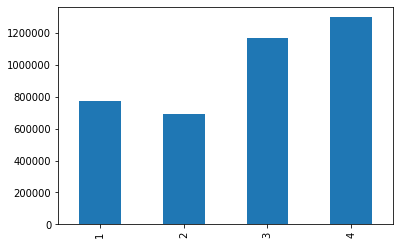

In [33]:
df_songs_heard_100_users['slot'].value_counts().sort_index()[:].plot(kind='bar')

In [34]:
df_songs_heard_100_users.shape

(3922101, 7)

Generating training and testing data

In [35]:
user_record_counts = input_dataset.groupby("userid").apply(lambda x: x.shape[0])

In [36]:
#Divide dataset into train and test based on users and the number of the songs listened
train_set_keys = []
test_set_keys = []
sum_val = 0
total = input_dataset.shape[0]
for key, value in user_record_counts.items():
    sum_val += value
    fraction = sum_val/total
    if fraction <= 0.8:
        train_set_keys.append(key)        
    else:
        test_set_keys.append(key)

In [37]:
print("Number of users in train set : "+str(len(train_set_keys)))
print("Number of users in test set : "+str(len(test_set_keys)))

Number of users in train set : 792
Number of users in test set : 198


In [38]:
train_set = input_dataset.groupby("userid").filter(lambda x: x['userid'].iloc[0] in train_set_keys)
test_set = input_dataset.groupby("userid").filter(lambda x: x['userid'].iloc[0] in test_set_keys)

In [39]:
print("Number of users in train set : "+str(train_set['userid'].nunique()))
print("Number of users in test set : "+str(test_set['userid'].nunique()))

Number of users in train set : 792
Number of users in test set : 198


In [40]:
train_set.shape[0]/total

0.7984888711432979

In [41]:
train_set.head()

,userid,songid,slot
22,user_000001,619,3
26,user_000001,2896,3
28,user_000001,1099,3
30,user_000001,3565,3
39,user_000001,3061,3


Use these dataframes¶
Creating train dataframes based on slots

In [42]:
test_set.head()

,userid,songid,slot
15511029,user_000802,1901,4
15511035,user_000802,3600,4
15511043,user_000802,1708,4
15511054,user_000802,3600,4
15511061,user_000802,3600,4


In [43]:
grouped_train_set = train_set.groupby('slot')
grouped_test_set = test_set.groupby('slot')

In [44]:
train_first_slot_df = grouped_train_set.get_group(1)
train_second_slot_df = grouped_train_set.get_group(2)
train_third_slot_df = grouped_train_set.get_group(3)
train_fourth_slot_df = grouped_train_set.get_group(4)

test_first_slot_df = grouped_test_set.get_group(1)
test_second_slot_df = grouped_test_set.get_group(2)
test_third_slot_df = grouped_test_set.get_group(3)
test_fourth_slot_df = grouped_test_set.get_group(4)

In [45]:
print('First train slot shape : ' + str(train_first_slot_df.shape))
print('Second train slot shape : ' + str(train_second_slot_df.shape))
print('Third train slot shape : ' + str(train_third_slot_df.shape))
print('Fourth train slot shape : ' + str(train_fourth_slot_df.shape))
print('')
print("Number of users in train_first_slot_df : " + str(train_first_slot_df['userid'].nunique()))
print("Number of users in train_second_slot_df : " + str(train_second_slot_df['userid'].nunique()))
print("Number of users in train_third_slot_df : " + str(train_third_slot_df['userid'].nunique()))
print("Number of users in train_fourth_slot_df : " + str(train_fourth_slot_df['userid'].nunique()))
print('')
print("Number of songs in train_first_slot_df : " + str(train_first_slot_df['songid'].nunique()))
print("Number of songs in train_second_slot_df : " + str(train_second_slot_df['songid'].nunique()))
print("Number of songs in train_third_slot_df : " + str(train_third_slot_df['songid'].nunique()))
print("Number of songs in train_fourth_slot_df : " + str(train_fourth_slot_df['songid'].nunique()))
print('')
print('First test slot shape : ' + str(test_first_slot_df.shape))
print('Second test slot shape : ' + str(test_second_slot_df.shape))
print('Third test slot shape : ' + str(test_third_slot_df.shape))
print('Fourth test slot shape : ' + str(test_fourth_slot_df.shape))
print('')
print("Number of users in test_first_slot_df : " + str(test_first_slot_df['userid'].nunique()))
print("Number of users in test_second_slot_df : " + str(test_second_slot_df['userid'].nunique()))
print("Number of users in test_third_slot_df : " + str(test_third_slot_df['userid'].nunique()))
print("Number of users in test_fourth_slot_df : " + str(test_fourth_slot_df['userid'].nunique()))
print('')
print("Number of songs in test_first_slot_df : " + str(test_first_slot_df['songid'].nunique()))
print("Number of songs in test_second_slot_df : " + str(test_second_slot_df['songid'].nunique()))
print("Number of songs in test_third_slot_df : " + str(test_third_slot_df['songid'].nunique()))
print("Number of songs in test_fourth_slot_df : " + str(test_fourth_slot_df['songid'].nunique()))


First train slot shape : (596866, 3)
Second train slot shape : (544262, 3)
Third train slot shape : (943222, 3)
Fourth train slot shape : (1047404, 3)

Number of users in train_first_slot_df : 737
Number of users in train_second_slot_df : 762
Number of users in train_third_slot_df : 784
Number of users in train_fourth_slot_df : 780

Number of songs in train_first_slot_df : 4034
Number of songs in train_second_slot_df : 4034
Number of songs in train_third_slot_df : 4034
Number of songs in train_fourth_slot_df : 4034

First test slot shape : (173856, 3)
Second test slot shape : (146390, 3)
Third test slot shape : (221677, 3)
Fourth test slot shape : (248424, 3)

Number of users in test_first_slot_df : 185
Number of users in test_second_slot_df : 188
Number of users in test_third_slot_df : 191
Number of users in test_fourth_slot_df : 193

Number of songs in test_first_slot_df : 4034
Number of songs in test_second_slot_df : 4034
Number of songs in test_third_slot_df : 4034
Number of songs 

In [46]:

# Get user-song-count dataframe for each slot
train_user_song_count_df_first = train_first_slot_df.groupby(["userid","songid"]).size().reset_index(name="count")
train_user_song_count_df_second = train_second_slot_df.groupby(["userid","songid"]).size().reset_index(name="count")
train_user_song_count_df_third = train_third_slot_df.groupby(["userid","songid"]).size().reset_index(name="count")
train_user_song_count_df_fourth = train_fourth_slot_df.groupby(["userid","songid"]).size().reset_index(name="count")

test_user_song_count_df_first = test_first_slot_df.groupby(["userid","songid"]).size().reset_index(name="count")
test_user_song_count_df_second = test_second_slot_df.groupby(["userid","songid"]).size().reset_index(name="count")
test_user_song_count_df_third = test_third_slot_df.groupby(["userid","songid"]).size().reset_index(name="count")
test_user_song_count_df_fourth = test_fourth_slot_df.groupby(["userid","songid"]).size().reset_index(name="count")

In [47]:
def get_rating(x):
    x['rating'] = pd.cut(x['count'], 5, labels=[1,2,3,4,5], right=True)
    return x

In [48]:

train_user_song_count_df_first = train_user_song_count_df_first.groupby("userid").apply(lambda x : get_rating(x))
train_user_song_count_df_second = train_user_song_count_df_second.groupby("userid").apply(lambda x : get_rating(x))
train_user_song_count_df_third = train_user_song_count_df_third.groupby("userid").apply(lambda x : get_rating(x))
train_user_song_count_df_fourth = train_user_song_count_df_fourth.groupby("userid").apply(lambda x : get_rating(x))

test_user_song_count_df_first = test_user_song_count_df_first.groupby("userid").apply(lambda x : get_rating(x))
test_user_song_count_df_second = test_user_song_count_df_second.groupby("userid").apply(lambda x : get_rating(x))
test_user_song_count_df_third = test_user_song_count_df_third.groupby("userid").apply(lambda x : get_rating(x))
test_user_song_count_df_fourth = test_user_song_count_df_fourth.groupby("userid").apply(lambda x : get_rating(x))

In [49]:

train_user_song_count_df_fourth.head()

,userid,songid,count,rating
0,user_000001,10,1,1
1,user_000001,171,1,1
2,user_000001,203,1,1
3,user_000001,398,1,1
4,user_000001,409,1,1


In [50]:
train_user_song_count_df_first.drop(['count'], axis=1, inplace=True)
train_user_song_count_df_second.drop(['count'], axis=1, inplace=True)
train_user_song_count_df_third.drop(['count'], axis=1, inplace=True)
train_user_song_count_df_fourth.drop(['count'], axis=1, inplace=True)

test_user_song_count_df_first.drop(['count'], axis=1, inplace=True)
test_user_song_count_df_second.drop(['count'], axis=1, inplace=True)
test_user_song_count_df_third.drop(['count'], axis=1, inplace=True)
test_user_song_count_df_fourth.drop(['count'], axis=1, inplace=True)

In [51]:
train_user_song_count_df_first.head()

,userid,songid,rating
0,user_000001,10,2
1,user_000001,27,4
2,user_000001,43,1
3,user_000001,91,1
4,user_000001,137,2


In [52]:

train_user_song_count_df_first['rating'] = train_user_song_count_df_first['rating'].astype('int')
train_user_song_count_df_second['rating'] = train_user_song_count_df_second['rating'].astype('int')
train_user_song_count_df_third['rating'] = train_user_song_count_df_third['rating'].astype('int')
train_user_song_count_df_fourth['rating'] = train_user_song_count_df_fourth['rating'].astype('int')

test_user_song_count_df_first['rating'] = test_user_song_count_df_first['rating'].astype('int')
test_user_song_count_df_second['rating'] = test_user_song_count_df_second['rating'].astype('int')
test_user_song_count_df_third['rating'] = test_user_song_count_df_third['rating'].astype('int')
test_user_song_count_df_fourth['rating'] = test_user_song_count_df_fourth['rating'].astype('int')

In [53]:
train_user_song_count_df_first.head()

,userid,songid,rating
0,user_000001,10,2
1,user_000001,27,4
2,user_000001,43,1
3,user_000001,91,1
4,user_000001,137,2


In [54]:
train_user_song_count_df_first.columns = ['userid', 'songid', 'count']
train_user_song_count_df_second.columns = ['userid', 'songid', 'count']
train_user_song_count_df_third.columns = ['userid', 'songid', 'count']
train_user_song_count_df_fourth.columns = ['userid', 'songid', 'count']

test_user_song_count_df_first.columns = ['userid', 'songid', 'count']
test_user_song_count_df_second.columns = ['userid', 'songid', 'count']
test_user_song_count_df_third.columns = ['userid', 'songid', 'count']
test_user_song_count_df_fourth.columns = ['userid', 'songid', 'count']

In [55]:
test_user_song_count_df_fourth.head()

,userid,songid,count
0,user_000802,2,1
1,user_000802,5,1
2,user_000802,14,1
3,user_000802,16,1
4,user_000802,22,1


In [56]:
train_user_song_count_df_first
train_user_song_count_df_second
train_user_song_count_df_third
train_user_song_count_df_fourth

test_user_song_count_df_first
test_user_song_count_df_second
test_user_song_count_df_third
test_user_song_count_df_fourth

,userid,songid,count
0,user_000802,2,1
1,user_000802,5,1
2,user_000802,14,1
3,user_000802,16,1
4,user_000802,22,1
5,user_000802,24,1
6,user_000802,51,1
7,user_000802,64,1
8,user_000802,68,1
9,user_000802,70,1


In [57]:
test_user_song_count_df_third

,userid,songid,count
0,user_000802,2,1
1,user_000802,5,1
2,user_000802,14,2
3,user_000802,22,1
4,user_000802,68,1
5,user_000802,70,1
6,user_000802,71,1
7,user_000802,74,1
8,user_000802,75,1
9,user_000802,81,1


In [58]:
test_user_song_count_df_first

,userid,songid,count
0,user_000802,2,1
1,user_000802,5,1
2,user_000802,14,1
3,user_000802,51,1
4,user_000802,64,1
5,user_000802,70,1
6,user_000802,81,4
7,user_000802,94,1
8,user_000802,117,1
9,user_000802,163,3


training data creatio

In [59]:
train_user_song_count_df_first['userid'] = train_user_song_count_df_first['userid'].astype("category").cat.codes

In [60]:
train_user_song_count_df_first.head()

,userid,songid,count
0,0,10,2
1,0,27,4
2,0,43,1
3,0,91,1
4,0,137,2


In [61]:
y_train_first = train_user_song_count_df_first.drop(['userid', 'songid'], axis=1, inplace=False)

In [62]:
y_train_first.head()

,count
0,2
1,4
2,1
3,1
4,2


In [63]:
training_data_first = train_user_song_count_df_first.drop(['count'], axis=1, inplace=False)

In [64]:
training_data_first.head()

,userid,songid
0,0,10
1,0,27
2,0,43
3,0,91
4,0,137


testing data creation

In [65]:
test_user_song_count_df_first['userid'] = test_user_song_count_df_first['userid'].astype("category").cat.codes

In [66]:
testing_data_first = test_user_song_count_df_first.drop(['count'], axis=1, inplace=False)

In [67]:
testing_data_first.head()

,userid,songid
0,0,2
1,0,5
2,0,14
3,0,51
4,0,64


In [68]:
y_test_first = test_user_song_count_df_first.drop(['userid', 'songid'], axis=1, inplace=False)

In [69]:
y_test_first.head()

,count
0,1
1,1
2,1
3,1
4,1


Implement Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
logreg_first = LogisticRegression()

In [71]:
logreg_first.fit(training_data_first, y_train_first)

C:\Users\divjot\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divjot\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\divjot\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_pred_first = logreg_first.predict(testing_data_first)

In [73]:
y_pred_first_frame = pd.DataFrame(y_pred_first)

In [74]:
y_pred_first_frame.head()

,0
0,1
1,1
2,1
3,1
4,1


In [75]:
predicted__first_full_frame = pd.concat([testing_data_first, y_pred_first_frame], axis=1)

In [76]:
predicted__first_full_frame.head()

,userid,songid,0
0,0,2,1
1,0,5,1
2,0,14,1
3,0,51,1
4,0,64,1


In [77]:
predicted__first_full_frame.columns = ['userid', 'songid', 'count']
predicted__first_full_frame.head()

,userid,songid,count
0,0,2,1
1,0,5,1
2,0,14,1
3,0,51,1
4,0,64,1


training data creation  second , third and fourth frame

In [78]:
# train_user_song_count_df_first['userid'] = train_user_song_count_df_first['userid'].astype("category").cat.codes

In [79]:
train_user_song_count_df_second['userid'] = train_user_song_count_df_second['userid'].astype("category").cat.codes
train_user_song_count_df_second.head()

,userid,songid,count
0,0,10,1
1,0,30,1
2,0,43,2
3,0,81,1
4,0,87,1


In [80]:
training_data_second = train_user_song_count_df_second.drop(['count'], axis=1, inplace=False)
training_data_second.head()

,userid,songid
0,0,10
1,0,30
2,0,43
3,0,81
4,0,87


In [81]:
train_user_song_count_df_third['userid'] = train_user_song_count_df_third['userid'].astype("category").cat.codes
train_user_song_count_df_third.head()

,userid,songid,count
0,0,4,1
1,0,10,2
2,0,26,1
3,0,27,1
4,0,30,1


In [82]:
training_data_third = train_user_song_count_df_third.drop(['count'], axis=1, inplace=False)
training_data_third.head()

,userid,songid
0,0,4
1,0,10
2,0,26
3,0,27
4,0,30


In [83]:
train_user_song_count_df_fourth['userid'] = train_user_song_count_df_fourth['userid'].astype("category").cat.codes
train_user_song_count_df_fourth.head()

,userid,songid,count
0,0,10,1
1,0,171,1
2,0,203,1
3,0,398,1
4,0,409,1


In [84]:
training_data_fourth = train_user_song_count_df_fourth.drop(['count'], axis=1, inplace=False)
training_data_fourth.head()

,userid,songid
0,0,10
1,0,171
2,0,203
3,0,398
4,0,409


In [85]:
# y_train_first = train_user_song_count_df_first.drop(['userid', 'songid'], axis=1, inplace=False)

In [86]:
y_train_second = train_user_song_count_df_second.drop(['userid', 'songid'], axis=1, inplace=False)
y_train_second.head()

,count
0,1
1,1
2,2
3,1
4,1


In [87]:
y_train_third = train_user_song_count_df_third.drop(['userid', 'songid'], axis=1, inplace=False)
y_train_third.head()

,count
0,1
1,2
2,1
3,1
4,1


In [88]:
y_train_fourth = train_user_song_count_df_fourth.drop(['userid', 'songid'], axis=1, inplace=False)
y_train_fourth.head()

,count
0,1
1,1
2,1
3,1
4,1


testing data creation for seond third and fourth frame 

In [89]:
test_user_song_count_df_second['userid'] = test_user_song_count_df_second['userid'].astype("category").cat.codes
test_user_song_count_df_third['userid'] = test_user_song_count_df_third['userid'].astype("category").cat.codes
test_user_song_count_df_fourth['userid'] = test_user_song_count_df_fourth['userid'].astype("category").cat.codes

In [90]:
testing_data_second = test_user_song_count_df_second.drop(['count'], axis=1, inplace=False)
testing_data_second.head()

,userid,songid
0,0,5
1,0,14
2,0,70
3,0,75
4,0,81


In [91]:
y_test_second = test_user_song_count_df_second.drop(['userid', 'songid'], axis=1, inplace=False)
y_test_second.head()

,count
0,1
1,1
2,1
3,1
4,3


In [92]:
testing_data_third = test_user_song_count_df_third.drop(['count'], axis=1, inplace=False)
testing_data_third.head()

,userid,songid
0,0,2
1,0,5
2,0,14
3,0,22
4,0,68


In [93]:
y_test_third = test_user_song_count_df_third.drop(['userid', 'songid'], axis=1, inplace=False)
y_test_third.head()

,count
0,1
1,1
2,2
3,1
4,1


In [94]:
testing_data_fourth = test_user_song_count_df_fourth.drop(['count'], axis=1, inplace=False)
testing_data_fourth.head()

,userid,songid
0,0,2
1,0,5
2,0,14
3,0,16
4,0,22


In [95]:
y_test_fourth = test_user_song_count_df_fourth.drop(['userid', 'songid'], axis=1, inplace=False)
y_test_fourth.head()

,count
0,1
1,1
2,1
3,1
4,1


Implement Logistic Regression for second 

In [96]:
from sklearn.linear_model import LogisticRegression
logreg_second = LogisticRegression()

In [97]:
logreg_second.fit(training_data_second, y_train_second)


C:\Users\divjot\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divjot\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\divjot\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
y_pred_second = logreg_first.predict(testing_data_second)

In [99]:
y_pred_second_frame = pd.DataFrame(y_pred_second)

In [100]:
y_pred_second_frame.head()

,0
0,1
1,1
2,1
3,1
4,1


In [101]:
predicted__second_full_frame = pd.concat([testing_data_second, y_pred_second_frame], axis=1)

In [102]:
predicted__second_full_frame.head()

,userid,songid,0
0,0,5,1
1,0,14,1
2,0,70,1
3,0,75,1
4,0,81,1


In [103]:
predicted__second_full_frame.columns = ['userid', 'songid', 'count']
predicted__second_full_frame.head()

,userid,songid,count
0,0,5,1
1,0,14,1
2,0,70,1
3,0,75,1
4,0,81,1


Implement Logistic Regression for third

In [104]:
from sklearn.linear_model import LogisticRegression
logreg_third = LogisticRegression()

In [105]:
training_data_third.head()

,userid,songid
0,0,4
1,0,10
2,0,26
3,0,27
4,0,30


In [106]:
logreg_third.fit(training_data_third, y_train_third)

C:\Users\divjot\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divjot\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\divjot\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
y_pred_third = logreg_third.predict(testing_data_third)

In [108]:
y_pred_third_frame = pd.DataFrame(y_pred_third)

In [109]:
y_pred_third_frame.head()

,0
0,1
1,1
2,1
3,1
4,1


In [110]:
predicted__third_full_frame = pd.concat([testing_data_third, y_pred_third_frame], axis=1)

In [111]:
predicted__third_full_frame.columns = ['userid', 'songid', 'count']
predicted__third_full_frame.head()

,userid,songid,count
0,0,2,1
1,0,5,1
2,0,14,1
3,0,22,1
4,0,68,1


Implement Logistic Regression for fourth

In [112]:
from sklearn.linear_model import LogisticRegression
logreg_fourth = LogisticRegression()

In [113]:
logreg_fourth.fit(training_data_fourth, y_train_fourth)

C:\Users\divjot\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divjot\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\divjot\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
y_pred_fourth = logreg_fourth.predict(testing_data_fourth)

In [115]:
y_pred_fourth_frame = pd.DataFrame(y_pred_fourth)

In [116]:
y_pred_fourth_frame.head()

,0
0,1
1,1
2,1
3,1
4,1


In [117]:
predicted__fourth_full_frame = pd.concat([testing_data_fourth, y_pred_fourth_frame], axis=1)

In [118]:
predicted__fourth_full_frame.columns = ['userid', 'songid', 'count']
predicted__fourth_full_frame.head()

,userid,songid,count
0,0,2,1
1,0,5,1
2,0,14,1
3,0,16,1
4,0,22,1


Prediction

In [119]:
# %%time
# test_set = [test_data_1, test_data_2, test_data_3, test_data_4]
# algo_set = [algo_1, algo_2, algo_3, algo_4]
# output_list = []
# # predict using test data
# results = []
# for item, algo in zip(test_set, algo_set):
#     output = pd.DataFrame(columns = ['userid', 'songid','score'])
#     for index, row in item.iterrows():
#         prediction = algo.predict(row['userid'], row['songid'], verbose=False)
#         predicted_rating = prediction.est
#         output = output.append(pd.Series([str(row['userid']), str(row['songid']), predicted_rating], index=output.columns), ignore_index=True)
#     output_list.append(output)

Calculate precision

In [120]:
def calculate_precision(actual, prediction):
    mean = actual['count'].mean()
    relevant = set(np.array(actual[actual['count']>mean/1.3]['songid'].astype('int')))
    recommended = set(np.array(prediction.nlargest(30, ['count'])['songid'].astype('int')))
    precision = len(recommended & relevant)/len(recommended)
    return precision

Calculate Recall

In [121]:
def calculate_recall(actual, prediction):
    mean = actual['count'].mean()
    relevant = set(np.array(actual[actual['count']>mean/1.3]['songid'].astype('int')))
    recommended = set(np.array(prediction.nlargest(30, ['count'])['songid'].astype('int')))
    if len(relevant) == 0:
        recall = 0
    else:
        recall = len(recommended & relevant)/len(relevant)
    return recall

Evaluation¶

In [122]:
def evaluation(actual, predictions):
    precision_sum = 0
    recall_sum = 0
    actual_grouped_by_user = actual.groupby('userid') 
    predictions_grouped_by_user = predictions.groupby('userid')
    number_of_users = len(actual_grouped_by_user)
    actual_key_list = actual_grouped_by_user.groups.keys()
#     number_of_users *= 0.5
    actual_val_list = []
    for item in actual_key_list:
        actual_val_list.append(actual_grouped_by_user.get_group(item))
        
    predictions_key_list = predictions_grouped_by_user.groups.keys()
    predictions_val_list = []
    for item in predictions_key_list:
        predictions_val_list.append(predictions_grouped_by_user.get_group(item))    
    for actual_group, pred_group in zip(actual_val_list, predictions_val_list):
        precision_sum += calculate_precision(actual_group, pred_group)
        recall_sum += calculate_recall(actual_group, pred_group)
    precision = precision_sum/number_of_users
    recall = recall_sum/number_of_users
    return precision, recall

In [123]:
precision_first, recall__first = evaluation(test_user_song_count_df_first, predicted__first_full_frame)

In [124]:
precision_first

0.7924951402050353

In [125]:
recall__first

0.39720319439257806

In [126]:
f1_score_first =  (2*precision_first*recall__first)/(precision_first+recall__first)

In [127]:
precision_second, recall__second = evaluation(test_user_song_count_df_second, predicted__second_full_frame)

In [128]:
precision_second

0.8057936694904784

In [129]:
recall__second

0.31056785596892544

In [130]:
f1_score_second =  (2*precision_second*recall__second)/(precision_second+recall__second)

In [131]:
precision_third, recall__third = evaluation(test_user_song_count_df_third, predicted__third_full_frame)

In [132]:
precision_third

0.8181497051690232

In [133]:
recall__third

0.220196073068113

In [134]:
f1_score_third =  (2*precision_third*recall__third)/(precision_third+recall__third)

In [140]:
f1_score_third

0.34700069290195573

In [135]:
precision_fourth, recall__fourth = evaluation(test_user_song_count_df_fourth, predicted__fourth_full_frame)

In [136]:
precision_fourth

0.8525377328486137

In [137]:
recall__fourth

0.22579377901745565

In [138]:
f1_score_fourth =  (2*precision_fourth*recall__fourth)/(precision_fourth+recall__fourth)

In [139]:
f1_score_fourth

0.35702882524826207